<a href="https://colab.research.google.com/github/Tehzeeb-hassan/Machine-Learning/blob/main/Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/MyDrive/dataset/ExpW/data'

image  label


In [4]:
!7za -y x' /content/drive/MyDrive/dataset/ExpW/data/image/origin.7z.001'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)



Command Line Error:
Unsupported command:
x /content/drive/MyDrive/dataset/ExpW/data/image/origin.7z.001


In [5]:
!ls '/content/drive/MyDrive/dataset/ExpW/data/image'

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [6]:
!7z x '/content/drive/MyDrive/dataset/ExpW/data/image/origin.7z.001'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/dataset/ExpW/data/image/                                                         1 file, 1048576000 bytes (1000 MiB)

Extracting archive: /content/drive/MyDrive/dataset/ExpW/data/image/origin.7z.001
  0% 1 Open           --
Path = /content/drive/MyDrive/dataset/ExpW/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg

In [8]:
!ls "/content/drive/MyDrive/origin"

afraid_African_960.jpg	    amazed_family_81.jpg
afraid_american_513.jpg     amazed_family_827.jpg
afraid_asian_305.jpg	    amazed_family_829.jpg
afraid_asian_367.jpg	    amazed_family_836.jpg
afraid_asian_4.jpg	    amazed_family_841.jpg
afraid_asian_501.jpg	    amazed_family_86.jpg
afraid_asian_70.jpg	    amazed_family_873.jpg
afraid_asian_77.jpg	    amazed_family_874.jpg
afraid_asian_7.jpg	    amazed_family_878.jpg
afraid_black_105.jpg	    amazed_family_89.jpg
afraid_black_282.jpg	    amazed_family_910.jpg
afraid_black_444.jpg	    amazed_family_913.jpg
afraid_boy_747.jpg	    amazed_family_914.jpg
afraid_chinese_41.jpg	    amazed_family_921.jpg
afraid_couple_248.jpg	    amazed_family_922.jpg
afraid_european_265.jpg     amazed_family_931.jpg
afraid_european_630.jpg     amazed_family_944.jpg
afraid_family_591.jpg	    amazed_family_94.jpg
afraid_father_424.jpg	    amazed_family_958.jpg
afraid_father_896.jpg	    amazed_family_96.jpg
afraid_girl_105.jpg	    amazed_family_980.jpg
afraid_girl

In [2]:
labels="/content/drive/MyDrive/dataset/ExpW/data/label/label.lst"
images="/content/drive/MyDrive/origin"

In [4]:
import pandas as pd

In [5]:
data_info= pd.read_csv(labels, sep=" ", header=None)

col_names = "image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_confidence expression_label".split()

data_info.columns = col_names
#data_path = "/content/drive/MyDrive/origin"
#data_info.head()

In [12]:
# data_info.to_csv('/content/drive/MyDrive/df.csv', index=False)

In [13]:
# df_verify = pd.read_csv('/content/drive/MyDrive/df.csv')

In [6]:
df_sel = data_info[data_info.face_box_confidence > 30]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


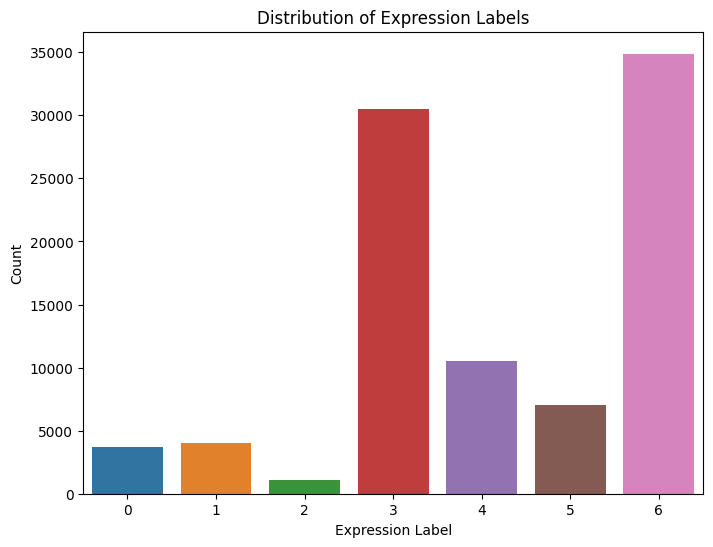

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='expression_label', data=data_info)
plt.xlabel('Expression Label')
plt.ylabel('Count')
plt.title('Distribution of Expression Labels')
plt.show()

In [9]:
import os
from os.path import split
import cv2

In [10]:
imglist =[]
lablelist = []
for i, row in df_sel.sample(5000).iterrows():
    img_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    img_path = os.path.join(images, img_name)
    img = cv2.imread(img_path)
    # Check if img is not None
    if img is not None:
        # Crop the image using the provided coordinates
        cropped_img = img[y1:y2, x1:x2]
    else:
        continue

    if cropped_img is not None:
        # Resize the cropped image to a fixed size (e.g., 64x64)
        resized_face = cv2.resize(cropped_img, (64, 64))
    else:
        continue

    # Normalize the image data (scaling pixel values to the range [0, 1])
    normalized_face = resized_face / 255.0
    imglist.append(normalized_face)
    lablelist.append(label)


In [11]:
len(lablelist)

304

In [12]:
import numpy as np


In [13]:

X = np.array(imglist)
Y = np.array(lablelist)

In [14]:
print("shape of images" , X.shape)
print("shape of lables" , Y.shape)


shape of images (304, 64, 64, 3)
shape of lables (304,)


In [15]:
from sklearn.model_selection import train_test_split


X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 212
Validation set size: 46
Testing set size: 46


In [16]:
from keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)
Y_test_one_hot = to_categorical(Y_test, num_classes=7)

In [17]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(7, activation='softmax'))

In [19]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                    

In [22]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

In [23]:

from keras.callbacks import TensorBoard

log_dir = "/content/drive/MyDrive/project/logs"
tensorboard_callback = TensorBoard(log_dir=log_dir)

# Train the model using the augmented data and TensorBoard callback
history = cnn_model.fit(datagen.flow(X_train, Y_train_one_hot, batch_size=32),
                            epochs=200,
                            validation_data=(X_val, Y_val_one_hot),
                            callbacks=[tensorboard_callback])

Epoch 1/200
7/7 [==============================] - 18s 2s/step - loss: 1.4438 - accuracy: 0.4198 - val_loss: 1.5488 - val_accuracy: 0.3696
Epoch 2/200
7/7 [==============================] - 7s 912ms/step - loss: 1.2598 - accuracy: 0.5377 - val_loss: 1.4631 - val_accuracy: 0.3696
Epoch 3/200
7/7 [==============================] - 10s 1s/step - loss: 1.2626 - accuracy: 0.5236 - val_loss: 1.4452 - val_accuracy: 0.3696
Epoch 4/200
7/7 [==============================] - 6s 919ms/step - loss: 1.2398 - accuracy: 0.5236 - val_loss: 1.4343 - val_accuracy: 0.3696
Epoch 5/200
7/7 [==============================] - 10s 1s/step - loss: 1.2283 - accuracy: 0.5283 - val_loss: 1.4369 - val_accuracy: 0.3696
Epoch 6/200
7/7 [==============================] - 6s 865ms/step - loss: 1.2104 - accuracy: 0.5189 - val_loss: 1.4086 - val_accuracy: 0.3696
Epoch 7/200
7/7 [==============================] - 8s 1s/step - loss: 1.2260 - accuracy: 0.5330 - val_loss: 1.4362 - val_accuracy: 0.3696
Epoch 8/200
7/7 [=====

In [24]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
Y_pred_one_hot = cnn_model.predict(X_test)
Y_pred = np.argmax(Y_pred_one_hot, axis=1)

2/2 [==============================] - 2s 152ms/step


In [27]:
Y_test_true = np.argmax(Y_test_one_hot, axis=1)

In [28]:
cm = confusion_matrix(Y_test_true, Y_pred)

In [29]:
model_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

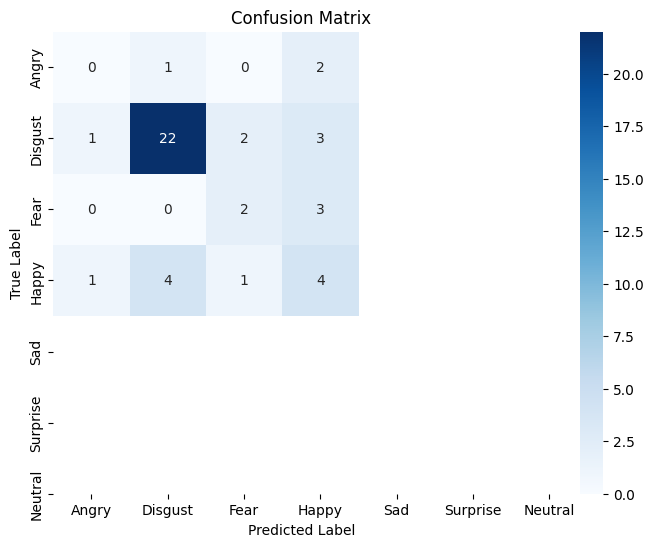

In [30]:

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_labels, yticklabels=model_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()